<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW4/how_to_read_and_map_census_data_in_python%5BLan%20Yu%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install census
!pip install CensusData


     |████████████████████████████████| 23.2MB 11.5MB/s 
  Created wheel for CensusData: filename=CensusData-1.9-cp36-none-any.whl size=24706266 sha256=32c43c5a3f8d00ed00e7d96c5a9663ce91dd4dda87dc1b378af3e3e19e20026b
  Stored in directory: /root/.cache/pip/wheels/39/4c/19/0770e56b66921fd366a5d32382b3db71e54aa98259f6bc88cb
Successfully built CensusData


In [2]:
!pip install us


     |████████████████████████████████| 133kB 8.4MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=cfb27226768c354661fa2a6e2d57746dec6676d865f8de7149974ab381fcf64c
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74741 sha256=8e11a4b62f8e2c0d918d7cbbecc64c45282b86c360723ff7f3b2ee6b092d8863
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [3]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 972kB 8.8MB/s 
     |████████████████████████████████| 10.9MB 21.9MB/s 
     |████████████████████████████████| 14.8MB 319kB/s 


In [4]:
!pip install shapely

In [5]:
# module for mapping; if you are familiar with pandas this should be intuitive
import geopandas as gpd

In [6]:
import pandas as pd
import numpy as np
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# mounting your drive (My Drive) to read the api key from a csv file. Look at the readme for more info

In [11]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [12]:
pwd

'/content/gdrive/My Drive'

In [13]:
ls

 19151595645700_.pic_hd.pdf
 19161595646251_.pic_hd.jpg
 19171595646474_.pic_hd.jpg
 341202199303220726-照片.jpg
 aff_download/
'application materials'/
'Colab Notebooks'/
'data science'/
 data_science_course_copy_notebook/
'ENEP 820 Intl Persp in Energy & Env'@
'ENEP Qualify (1)'/
'funding '/
 GEOG681/
 giftcard/
 group_three_final_project/
 HW2_Lan_Yu.ipynb
 IMG_0007.MOV
"lan's coding challenge"/
 lanyu_weekly_reports/
'lawrence part'/
 lwir_lan_first_semester/
'machine learning and data science hw'/
 Machine_Learning_course/
'matrix question 1.docx'
 mlpp20/
 MLPP2020/
 mlpp20_assignment_05_Lan_Yu.ipynb
'MLPP Project'@
 myapis.csv
 Notability/
'Notability (1)'/
'Notability (2)'/
 note/
'pedestrian survey count'/
 puftd_gdrive/
 qiba/
'QUALIFY READING'/
 qualify_TES/
'Question 1 Analyzing the causes of two contemporary conflicts.docx'
 self_practice/
 sensor/
'shift occured.png'
 tes.pdf
 testDiffSheets.ipynb
'The Business of International Development.pdf'
'uapp 821'/
 UAPP822_SUMMARY/

## read about the census API DO NOT PRINT IT! your API key should be secret

In [14]:
myAPIkey =  pd.read_csv("myapis.csv")["census"]


# example of reading race data at the county level.

In [15]:
# import modules to get census data
# register with your API key
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)

### look in the census variables the ones apprioriate for race. 

We are going to use the 5 year American Community Survey (```acs5```), which is ran by the Census Boureaum, but it is not the Census, in that it does not aspire to collect data about every US resident, but it is run more often (5 years). There is also an annual American Community Survey (```acs1```)

In [245]:
censusdata.search('acs5', 2018, 'concept', 'race')


[('B01001F_001E', 'SEX BY AGE (SOME OTHER RACE ALONE)', 'Estimate!!Total'),
 ('B01001F_002E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male'),
 ('B01001F_003E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001F_004E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001F_005E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001F_006E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001F_007E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001F_008E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001F_009E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001F_010E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001F_011E',
  'SEX

These are the variables that interest us. They start with B02001

('B02001_001E', 'RACE', 'Estimate!!Total'),

('B02001_002E', 'RACE', 'Estimate!!Total!!White alone'),

 ('B02001_003E', 'RACE', 'Estimate!!Total!!Black or African American alone'),

 

In [237]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B02001')), 


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | RACE                           | !! Estimate Total                                        | int  
B02001_002E  | RACE                           | !! !! Estimate Total White alone                         | int  
B02001_003E  | RACE                           | !! !! Estimate Total Black or African American alone     | int  
B02001_004E  | RACE                           | !! !! Estimate Total American Indian and Alaska Native a | int  
B02001_005E  | RACE                           | !! !! Estimate Total Asian alone                         | int  
B02001_006E  | RACE                           | !! !! Estimate Total Native Hawaiian and Other Pacific I | int  
B02001_007E  | RACE                           | !! !! Estimate Total Some other race alone   

(None,)

get the state code for DE

In [238]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)


{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

get the data at county granularity. Tract granularity is not available for these data in this survey

In [342]:
total18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
wDEcounty18                            

,B02001_002E
"New Castle County, Delaware: Summary level: 050, state:10> county:003",358183
"Sussex County, Delaware: Summary level: 050, state:10> county:005",180762
"Kent County, Delaware: Summary level: 050, state:10> county:001",115960


# get the same data for the _previous_ ACS5 as well (remember, the ACS5 is done every 5 years)

In [246]:
censusdata.search('acs5', 2013, 'concept', 'race')

[('B01001F_001E', 'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)', 'Total:'),
 ('B01001F_001M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Total:'),
 ('B01001F_002E', 'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)', 'Male:'),
 ('B01001F_002M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:'),
 ('B01001F_003E',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Male:!!Under 5 years'),
 ('B01001F_003M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:!!Under 5 years'),
 ('B01001F_004E',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Male:!!5 to 9 years'),
 ('B01001F_004M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:!!5 to 9 years'),
 ('B01001F_005E',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Male:!!10 to 14 years'),
 ('B01001F_005M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:!!10 to 14 years'),
 ('B01001F_

In [247]:
censusdata.printtable(censusdata.censustable('acs5', 2013, 'B02001')), 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | B02001.  Race                  | Total:                                                   | int  
B02001_002E  | B02001.  Race                  | White alone                                              | int  
B02001_003E  | B02001.  Race                  | Black or African American alone                          | int  
B02001_004E  | B02001.  Race                  | American Indian and Alaska Native alone                  | int  
B02001_005E  | B02001.  Race                  | Asian alone                                              | int  
B02001_006E  | B02001.  Race                  | Native Hawaiian and Other Pacific Islander alone         | int  
B02001_007E  | B02001.  Race                  | Some other race alone                        

(None,)

In [244]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2013)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [343]:
total13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
bDEcounty13  

,B02001_003E
"Kent County, Delaware: Summary level: 050, state:10> county:001",39802
"New Castle County, Delaware: Summary level: 050, state:10> county:003",130133
"Sussex County, Delaware: Summary level: 050, state:10> county:005",25029


## merge the blackpop dataframe with the total dataframe to extract the fraction of black people. 
## merge the whitepop dataframe with the total dataframe to extract the fraction of white people. 
 

In [344]:
bDEcounty18 = bDEcounty18.merge(total18, left_on=bDEcounty18.index, right_on=total18.index)
wDEcounty18 = wDEcounty18.merge(total18, left_on=wDEcounty18.index, right_on=total18.index)
bDEcounty18

bDEcounty13 = bDEcounty13.merge(total13, left_on=bDEcounty13.index, right_on=total13.index)
wDEcounty13 = wDEcounty13.merge(total13, left_on=wDEcounty13.index, right_on=total13.index)
bDEcounty13

,key_0,B02001_003E,B02001_001E
0,"Kent County, Delaware: Summary level: 050, sta...",39802,165030
1,"New Castle County, Delaware: Summary level: 05...",130133,542784
2,"Sussex County, Delaware: Summary level: 050, s...",25029,200632


In [345]:
bDEcounty18["black_fraction"] = bDEcounty18["B02001_003E"]/bDEcounty18["B02001_001E"]
wDEcounty18["white_fraction"] = wDEcounty18["B02001_002E"]/wDEcounty18["B02001_001E"]
bDEcounty18


bDEcounty13["black_fraction"] = bDEcounty13["B02001_003E"]/bDEcounty13["B02001_001E"]
wDEcounty13["white_fraction"] = wDEcounty13["B02001_002E"]/wDEcounty13["B02001_001E"]
bDEcounty13

,key_0,B02001_003E,B02001_001E,black_fraction
0,"Kent County, Delaware: Summary level: 050, sta...",39802,165030,0.241180
1,"New Castle County, Delaware: Summary level: 05...",130133,542784,0.239751
2,"Sussex County, Delaware: Summary level: 050, s...",25029,200632,0.124751


## the county index needs to be manipulated
The county name in the dataframes you created needs to be extracted from the index. 
Use the method ```split``` of a string on each row of the index. you can write a function such as

```
def getcounty(cname):
  return cname.split(':')[-1]
```
a function like this will extract the county from the name, this function can be passed to a column (the index in this case) of a dataframe to create a new colum as a modification of the previous one.

In [346]:
def getcounty(cname):
  return cname.split(':')[-1]

In [347]:
# manipulate index to extract the county
wDEcounty18["county"] = wDEcounty18["key_0"].astype(str).map(getcounty)
bDEcounty18["county"] = bDEcounty18["key_0"].astype(str).map(getcounty)





wDEcounty13["county"] = wDEcounty13["key_0"].astype(str).map(getcounty)
bDEcounty13["county"] = bDEcounty13["key_0"].astype(str).map(getcounty)

In [300]:
bDEcounty13

,key_0,B02001_003E,B02001_001E,black_fraction,county
0,"Kent County, Delaware: Summary level: 050, sta...",39802,165030,0.241180,001
1,"New Castle County, Delaware: Summary level: 05...",130133,542784,0.239751,003
2,"Sussex County, Delaware: Summary level: 050, s...",25029,200632,0.124751,005


# Get the DE shape file. 

Lets get it at the census tract level, even if we only have data at the county level right now
## download census tracts file from here  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
## and here  https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip


In [187]:
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
!wget https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip

--2020-09-28 06:14:28--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 23.198.24.18, 2a02:26f0:6b:58a::208c, 2a02:26f0:6b:5a0::208c
Connecting to www2.census.gov (www2.census.gov)|23.198.24.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_10_tract.zip.1’

tl_2018_10_tract.zi     [ <=>                ] 997.34K  --.-KB/s    in 0.1s    

2020-09-28 06:14:28 (8.04 MB/s) - ‘tl_2018_10_tract.zip.1’ saved [1021272]

--2020-09-28 06:14:28--  https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip
Resolving www2.census.gov (www2.census.gov)... 23.198.24.18, 2a02:26f0:6b:58a::208c, 2a02:26f0:6b:5a0::208c
Connecting to www2.census.gov (www2.census.gov)|23.198.24.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_us_county.zip’

tl_2018_us_county.z     [     

In [256]:
!wget https://www2.census.gov/geo/tiger/TIGER2013/TRACT/tl_2013_10_tract.zip
!wget https://www2.census.gov/geo/tiger/TIGER2013/COUNTY/tl_2013_us_county.zip

--2020-09-28 06:51:21--  https://www2.census.gov/geo/tiger/TIGER2013/TRACT/tl_2013_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 23.198.24.18, 2a02:26f0:6b:58a::208c, 2a02:26f0:6b:5a0::208c
Connecting to www2.census.gov (www2.census.gov)|23.198.24.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2013_10_tract.zip’

tl_2013_10_tract.zi     [  <=>               ] 979.65K  2.54MB/s    in 0.4s    

2020-09-28 06:51:22 (2.54 MB/s) - ‘tl_2013_10_tract.zip’ saved [1003157]

--2020-09-28 06:51:22--  https://www2.census.gov/geo/tiger/TIGER2013/COUNTY/tl_2013_us_county.zip
Resolving www2.census.gov (www2.census.gov)... 23.198.24.18, 2a02:26f0:6b:58a::208c, 2a02:26f0:6b:5a0::208c
Connecting to www2.census.gov (www2.census.gov)|23.198.24.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2013_us_county.zip’

tl_2013_us_county.z     [         

In [188]:
#save it on the drive, unzip it
!unzip tl_2018_10_tract.zip
!unzip tl_2018_us_county.zip

Archive:  tl_2018_10_tract.zip
replace tl_2018_10_tract.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: tl_2018_10_tract.cpg    
replace tl_2018_10_tract.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2018_10_tract.dbf    
replace tl_2018_10_tract.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2018_10_tract.prj    
replace tl_2018_10_tract.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2018_10_tract.shp    
replace tl_2018_10_tract.shp.ea.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2018_10_tract.shp.ea.iso.xml  
replace tl_2018_10_tract.shp.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2018_10_tract.shp.iso.xml  
replace tl_2018_10_tract.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tl_2018_10_tract.shx    
Archive:  tl_2018_us_county.zip
 extracting: tl_2018_us_county.cpg   
  inflating: tl_2018_us_county.dbf   
  inflating: tl_2018_us_county.prj   
  inflating: tl_2018_us_county.sh

In [257]:
#save it on the drive, unzip it
!unzip tl_2013_10_tract.zip
!unzip tl_2013_us_county.zip

Archive:  tl_2013_10_tract.zip
  inflating: tl_2013_10_tract.dbf    
  inflating: tl_2013_10_tract.prj    
  inflating: tl_2013_10_tract.shp    
  inflating: tl_2013_10_tract.shp.xml  
  inflating: tl_2013_10_tract.shx    
Archive:  tl_2013_us_county.zip
  inflating: tl_2013_us_county.dbf   
  inflating: tl_2013_us_county.prj   
  inflating: tl_2013_us_county.shp   
  inflating: tl_2013_us_county.shp.xml  
  inflating: tl_2013_us_county.shx   


In [258]:
gde18 = gpd.GeoDataFrame.from_file("tl_2018_10_tract.shp")
gde18.shape

(218, 13)

In [259]:
gde13 = gpd.GeoDataFrame.from_file("tl_2013_10_tract.shp")
gde13.shape

(218, 13)

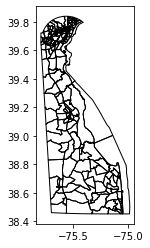

In [260]:
gde18.plot(color="None", edgecolor='k')

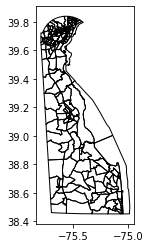

In [261]:
gde13.plot(color="None", edgecolor='k')

This map includes census tracts that are all water in the Delaware rever. Remove them using the ALAND column, which is the area of the tract that is not water

In [348]:
#delete
# only select where the land is >0
gde18 = gde18[gde18["ALAND"] > 0]
gde18.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."


In [349]:
gde13 = gde13[gde13["ALAND"] > 0]
gde13.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,001,040502,10001040502,405.02,Census Tract 405.02,G5020,S,29338746,460584,+39.2124546,-075.5318450,"POLYGON ((-75.58118 39.24207, -75.58091 39.242..."
1,10,001,043202,10001043202,432.02,Census Tract 432.02,G5020,S,295746938,46358358,+39.1456369,-075.4324097,"POLYGON ((-75.54956 39.35384, -75.54939 39.353..."
2,10,001,040501,10001040501,405.01,Census Tract 405.01,G5020,S,10437785,0,+39.1996806,-075.5439783,"POLYGON ((-75.58810 39.24403, -75.58806 39.244..."
4,10,001,043400,10001043400,434,Census Tract 434,G5020,S,66114020,653104,+38.9723618,-075.4729061,"POLYGON ((-75.52892 39.01019, -75.52871 39.010..."
5,10,001,043300,10001043300,433,Census Tract 433,G5020,S,7685239,380826,+39.1802210,-075.5466473,"POLYGON ((-75.57117 39.19107, -75.57109 39.191..."


Now merge the geo data frame with the data frame. 
IMPORTANT! start the merge from the geodataframe:
```gde.merge...```. 
if you start it from the dataframe (```wDEcounty.merge```) you end up with a dataframe, not a geodataframe

In [350]:
wgdeDE18 = gde18.merge(wDEcounty18, left_on = "COUNTYFP", right_on = "county")
wgdeDE13 = gde13.merge(wDEcounty13, left_on = "COUNTYFP", right_on = "county")


In [351]:
bgdeDE18 = gde18.merge(bDEcounty18, left_on = "COUNTYFP", right_on = "county")
bgdeDE13 = gde13.merge(bDEcounty13, left_on = "COUNTYFP", right_on = "county")

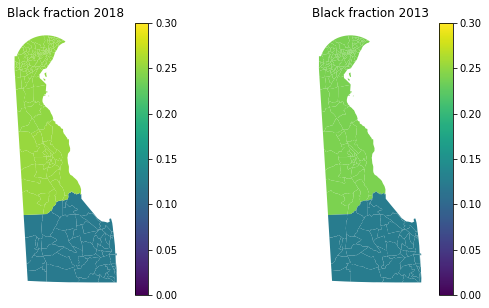

In [353]:
# map the fraction of Black populatoin in 2018 and 2013
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
bgdeDE18.plot(column="black_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.0, vmax=0.3)
ax.axis('off');
plt.title("Black fraction 2018")

ax = fig.add_subplot(122)
bgdeDE13.plot(column="black_fraction", 
               ax=ax, legend=True, vmin=0.0, vmax=0.3);
ax.axis('off');
plt.title("Black fraction 2013");

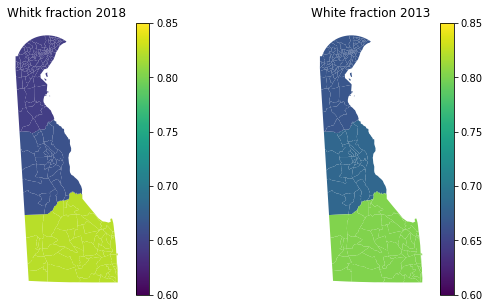

In [356]:
# do the same for the white population
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
wgdeDE18.plot(column="white_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.6, vmax=0.85)
ax.axis('off');
plt.title("Whitk fraction 2018")

ax = fig.add_subplot(122)
wgdeDE13.plot(column="white_fraction", 
               ax=ax, legend=True, vmin=0.6, vmax=0.85);
ax.axis('off');
plt.title("White fraction 2013");

# extra credit

Can you get a map of a demographic variable (e.g. age, education...) at the tract level?

In [358]:
censusdata.search('acs5', 2018, 'concept', 'age')

[('B01001A_001E', 'SEX BY AGE (WHITE ALONE)', 'Estimate!!Total'),
 ('B01001A_002E', 'SEX BY AGE (WHITE ALONE)', 'Estimate!!Total!!Male'),
 ('B01001A_003E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001A_004E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001A_005E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001A_006E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001A_007E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001A_008E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001A_009E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001A_010E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001A_011E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!35 to 44 years'),
 ('B01001A_012E',
  'SEX BY AGE (WHI

In [359]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01001')),

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total                                        | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male                                | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total Male Under 5 years               | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total Male 5 to 9 years                | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total Male 10 to 14 years              | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total Male 15 to 17 years              | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total Male 18 and 19 years 

(None,)

In [362]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [373]:

total_age = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B01001_001E"])


female_age = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B01001_027E"])

male_age = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B01001_003E"])
total_age.head()

,B01001_001E
"New Castle County, Delaware: Summary level: 050, state:10> county:003",555133
"Sussex County, Delaware: Summary level: 050, state:10> county:005",219540
"Kent County, Delaware: Summary level: 050, state:10> county:001",174822


In [376]:
total_age["county"] =total_age.index.astype(str).map(getcounty)
male_age["county"] =male_age.index.astype(str).map(getcounty)
female_age["county"] =female_age.index.astype(str).map(getcounty)
male_age

,B01001_003E,county
"New Castle County, Delaware: Summary level: 050, state:10> county:003",16594,003
"Sussex County, Delaware: Summary level: 050, state:10> county:005",5663,005
"Kent County, Delaware: Summary level: 050, state:10> county:001",5556,001


In [384]:
total_age["total_population"] = total_age["B01001_001E"].values
female_age["less_than_5"] = female_age["B01001_027E"].values
male_age["less_than_5"] = male_age["B01001_003E"].values
female_age["fraction"] = female_age["less_than_5"]/total_age["total_population"]
male_age["fraction"] = male_age["less_than_5"]/total_age["total_population"]

In [385]:
female = gde18.merge(female_age, left_on = "COUNTYFP", right_on = "county")
male = gde18.merge(male_age, left_on = "COUNTYFP", right_on = "county")


Text(0.5, 1.0, '2018 Proportion of male \nunder 5 years of total population')

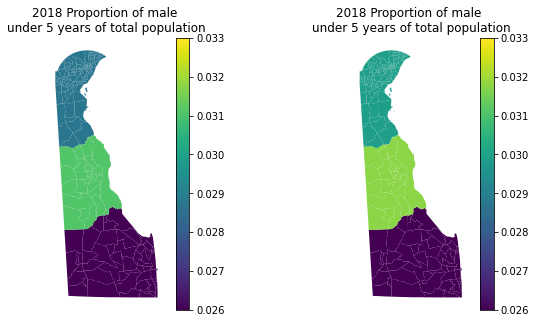

In [409]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
female.plot(column="fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.026, vmax=0.033)
ax.axis('off');
plt.title("2018 Proportion of male \nunder 5 years of total population")

ax = fig.add_subplot(122)
male.plot(column="fraction", 
               ax=ax, legend=True, vmin=0.026, vmax=0.033);
ax.axis('off');
plt.title("2018 Proportion of male \nunder 5 years of total population")
